In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers 
import os

thisdict = {
  0: "Apple___Apple_scab",
  1: "Apple___Black_rot",
  2: "Apple___Cedar_apple_rust",
  3: "Apple___healthy",
  4: "Blueberry___healthy",
  5: "Cherry_(including_sour)___healthy",
  6: "Cherry_(including_sour)___Powdery_mildew",
  7: "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
  8: "Corn_(maize)___Common_rust_",
  9: "Corn_(maize)___healthy",
  10: "Corn_(maize)___Northern_Leaf_Blight",
  11: "Grape___Black_rot",
  12: "Grape___Esca_(Black_Measles)",
  13: "Grape___healthy",
  14: "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
  15: "Orange___Haunglongbing_(Citrus_greening)",
  16: "Peach___Bacterial_spot",
  17: "Peach___healthy",
  18: "Pepper,_bell___Bacterial_spot",
  19: "Pepper,_bell___healthy",
  20: "Potato___Early_blight",
  21: "Potato___healthy",
  22: "Potato___Late_blight",
  23: "Raspberry___healthy"
}



In [2]:
from keras.layers import Convolution2D

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
from keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(units=128, activation='relu'))

In [17]:
model.add(Dense(units=60, activation='relu'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7

In [19]:
model.add(Dense(units=24, activation='softmax'))
#model.add(Dense(8, activation='softmax'))   # Final Layer using Softmax

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [22]:
from keras_preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'DataSet/TrainingDataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        'DataSet/TestDataset/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 7234 images belonging to 24 classes.
Found 3328 images belonging to 24 classes.


In [34]:

model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set
    )
        

Epoch 1/10
227/227 [==============================] - 38s 167ms/step - loss: 0.2392 - accuracy: 0.9195 - val_loss: 0.5995 - val_accuracy: 0.8314
Epoch 2/10
227/227 [==============================] - 38s 166ms/step - loss: 0.2186 - accuracy: 0.9245 - val_loss: 1.2091 - val_accuracy: 0.7130
Epoch 3/10
227/227 [==============================] - 38s 166ms/step - loss: 0.2374 - accuracy: 0.9180 - val_loss: 0.4871 - val_accuracy: 0.8705
Epoch 4/10
227/227 [==============================] - 38s 166ms/step - loss: 0.2359 - accuracy: 0.9180 - val_loss: 0.4983 - val_accuracy: 0.8531
Epoch 5/10
227/227 [==============================] - 38s 165ms/step - loss: 0.1905 - accuracy: 0.9332 - val_loss: 0.5711 - val_accuracy: 0.8453
Epoch 6/10
227/227 [==============================] - 38s 165ms/step - loss: 0.1919 - accuracy: 0.9356 - val_loss: 0.4234 - val_accuracy: 0.8765
Epoch 7/10
227/227 [==============================] - 38s 166ms/step - loss: 0.1648 - accuracy: 0.9453 - val_loss: 0.4821 - val_ac

In [25]:
model.save('DiseaseSava.h5')

In [26]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [27]:
m = load_model('DiseaseSava.h5')

In [28]:
from keras.preprocessing import image

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Number of Categories: 24
Category Number: 6
Leaf and Disease Name: Cherry_(including_sour)___Powdery_mildew


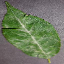

In [29]:
import numpy as np
import random
n = random.randint(0,23)
test_image = image.load_img("DataSet/SinglePrediction/%d.JPG" %n , target_size=(64,64))
test_image1 = image.img_to_array(test_image)
test_image2 = np.expand_dims(test_image1, axis=0)
model_predict = m.predict(test_image2)


num = np.array(model_predict[0])  
np.set_printoptions(precision = 3, suppress = True) 
print(num)

print("Number of Categories:",len(num))
print("Category Number:",n)
print("Leaf and Disease Name:",thisdict[n])
test_image

In [30]:
#test_set.class_indices


In [31]:
import pickle

In [32]:
file=open("model.pkl","wb")
pickle.dump(model_predict,file)

AttributeError: 'tuple' object has no attribute 'astype'

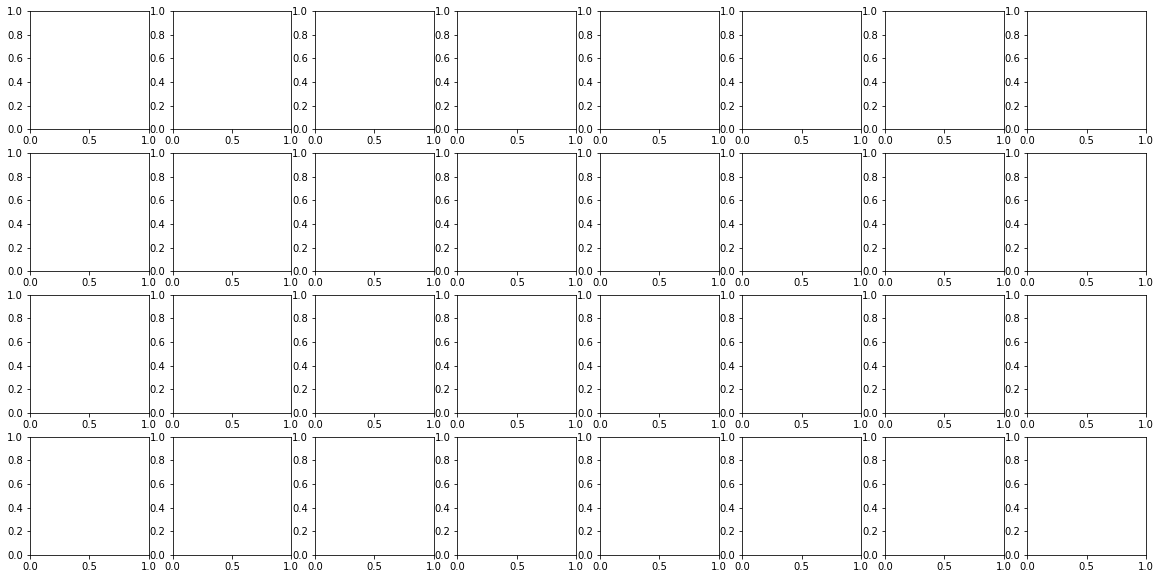

In [33]:
#imgs = (((test_set[0:4]+1.)/2.)*255.) # transform pixels into range [0,255]
imgs_generated =test_set

fig, axs = plt.subplots(4, 8, figsize=(20, 10))

for i in range(8):
    axs[0,i].imshow(imgs_generated[0].astype(np.uint8))
    axs[1,i].imshow(imgs_generated[1].astype(np.uint8))
    axs[2,i].imshow(imgs_generated[2].astype(np.uint8))
    axs[3,i].imshow(imgs_generated[3].astype(np.uint8))   
    imgs_generated = generate_images(imgs)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("DataSet/TestDataset/Apple___Apple_scab/154842bb-6ee3-4176-9007-cf7a43cfe140___FREC_Scab 3434_270deg.JPG")
plt.imshow(image)
plt.axis("off")
plt.imshow(image)
plt.show()

In [ ]:
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(image)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [ ]:
from PIL import Image

img = Image.open('DataSet/TestDataset/Apple___Apple_scab/23466313-6a2c-46e7-ad89-1f95dd2d3b40___FREC_Scab 3517.JPG')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

In [ ]:
imgplot = plt.imshow(image, clim=(0.0, 0.7))

In [ ]:
imgplot = plt.imshow(image, interpolation="bicubic")

In [ ]:
#plt.imshow(test_set[4][0][5])

In [ ]:
#plt.imshow(training_set[0][0][6])

In [ ]:
#theta3 =np.zeros(10,dtype='float32')

In [ ]:
'''
x = np.float32(q)
x.tolist()            # 1.899999976158142
x.item()              # 1.899999976158142
x.view()              # 1.9
str(x)                # '1.9'
float(str(x))  

x = np.float32(q)
print(type(x))
v = x.item()
print(type(v))
print(v)

import numpy
print(type(q))
print(q)
print(type(numpy.float(q)))
print(numpy.float(q))


lst = []
print(q)
o = "{:.23f}".format(q)
lst.append(o)
"""

In [ ]:
'''
import numpy as np
np.set_printoptions(suppress=True) 
a = np.array(q) 
print(a) 
'''

In [ ]:
'''
import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:.25f}'.format})

a = np.array(q) 

print(a)  
'''

In [ ]:
'''
import numpy as np  
num = np.array(p[0])  
  
#print("Numpy array values with precision 2:\n") 
np.set_printoptions(precision = 2, suppress = True) 
print(num)
'''

In [ ]:
'''
lst = []
import numpy as np
import sys
e = np.savetxt(sys.stdout, p, '%19.3f') 
lst.append(e)
'''

In [ ]:
"""
for i in range(1,34):
    #print(i)
    test_image = image.load_img("DataSet/SinglePrediction/%d.JPG" %i , target_size=(64,64))
    test_image = image.img_to_array(test_image)
    #print(test_image.shape)
    test_image = np.expand_dims(test_image, axis=0)
    #print(test_image.shape)
    #print(m.predict(test_image))
    """

In [ ]:
"""
test_image = image.load_img('DataSet/SinglePrediction/f.JPG', 
               target_size=(64,64))
type(test_image)
test_image = image.img_to_array(test_image)
type(test_image)
test_image.shape
import numpy as np 
test_image = np.expand_dims(test_image, axis=0)
test_image.shape
m.predict(test_image)
"""